# Natural Language Processing (NLP) -- Text mining(2)

Name: SAI AKHIL SN | Batch Date: 27 Jan 2021

### Web scraping using Beautiful Soup and sentiment analysis

### Business problem: 
Extract reviews of any product from ecommerce website like amazon 

Perform emotion mining

In [1]:
# Importing necessary libraries
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [2]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/product-reviews/B073Q5R6VR/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews'

In [3]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [4]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [5]:
len(cust_name)

2276

In [6]:
len(review_title)

2276

In [7]:
len(review_content)

2276

In [8]:
len(rate)

2276

In [9]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [10]:
!pip install -U textblob
!python -m textblob.download_corpora

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('stopwords')

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]  

True

In [11]:
df = pd.DataFrame()

In [12]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [13]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews
0,ba_doh,Read this review before you buy ... may save y...,4.0 out of 5 stars,Okay. So you have been seeing people display...
1,Shantanu Bangar,Superb,5.0 out of 5 stars,It's amazing..... battery last around 10 -12...
2,PK Singh,"Finally, got my Mac !!!!",5.0 out of 5 stars,Finally a MacBook possession. Got it in 50k ...
3,Sumit Kukade,DEAD after 1 year two months...,1.0 out of 5 stars,We buy macbook's expecting that it will last...
4,saurabh chauhan,My first apple product: fully satisfied- here ...,5.0 out of 5 stars,Best Laptop under 60k. If you don't want any...
5,Kaushal,Justified Apple Product,5.0 out of 5 stars,Pros:1. Light weight and super fast response...
6,Anvit shetty,Dead mac book air,1.0 out of 5 stars,"Bought this product recently on 5 April, was..."
7,Romeo Menezes,MacBook motherboard and battery collapsed.,1.0 out of 5 stars,I am very upset about the product as I check...
8,Jagdeep Sharma,Takes six figure out of your pocket and then d...,1.0 out of 5 stars,"Hi, Think thousand time before buying. One c..."
9,Jason,Perfect product!,4.0 out of 5 stars,I have been a Macbook pro user for last 2 ye...


In [14]:
df.to_csv(r'E:fill.csv',index = True)


In [15]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [16]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [17]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [18]:
data['Rating']

0       4.0
1       5.0
2       5.0
3       1.0
4       5.0
       ... 
2271    5.0
2272    5.0
2273    5.0
2274    5.0
2275    5.0
Name: Rating, Length: 2276, dtype: object

In [19]:
data['Rating'].value_counts(normalize=True)*100

5.0    67.530756
1.0    13.356766
4.0    12.917399
3.0     3.383128
2.0     2.811951
Name: Rating, dtype: float64

In [20]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,304,304,304
2.0,64,64,64
3.0,77,77,77
4.0,294,294,294
5.0,1537,1537,1535


Text(0, 0.5, 'Count')

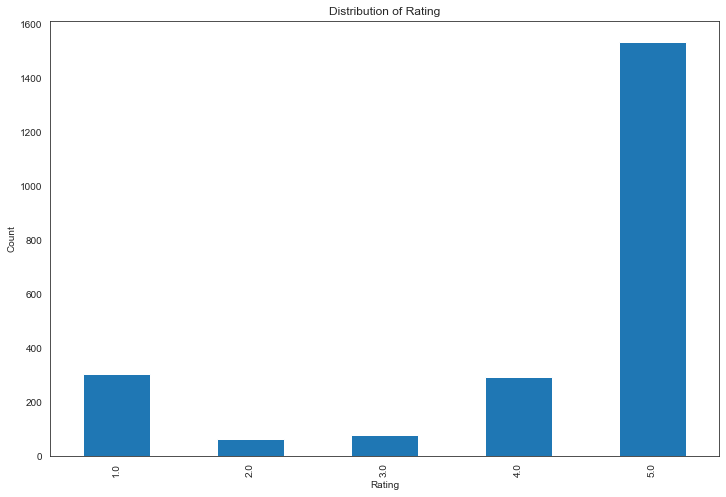

In [21]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

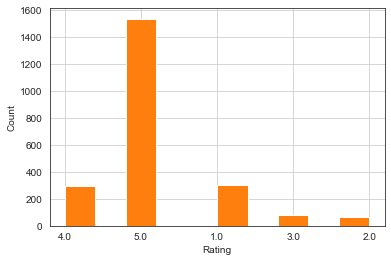

In [22]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [23]:
data.iloc[:,[3]]

,Reviews
0,Okay. So you have been seeing people display...
1,It's amazing..... battery last around 10 -12...
2,Finally a MacBook possession. Got it in 50k ...
3,We buy macbook's expecting that it will last...
4,Best Laptop under 60k. If you don't want any...
...,...
2271,good
2272,Good
2273,👍👍👍
2274,Good value


In [24]:

Reviews=data.iloc[:,[3]]

In [25]:
Reviews.shape

(2276, 1)

In [26]:
Reviews.describe()

,Reviews
count,2274
unique,2093
top,Good
freq,35


In [27]:
Reviews.dtypes

Reviews    object
dtype: object

In [28]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

data.head()

,Rating,Reviews
0,4.0,Okay. So you have been seeing people display...
1,5.0,It's amazing..... battery last around 10 -12...
2,5.0,Finally a MacBook possession. Got it in 50k ...
3,1.0,We buy macbook's expecting that it will last...
4,5.0,Best Laptop under 60k. If you don't want any...


In [32]:
data.Reviews.isna().sum()

2

In [33]:
data['Reviews']=data['Reviews'].fillna(" ")

In [34]:
data.Reviews.isna().sum()

0

In [35]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###

data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [36]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [37]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

In [38]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [39]:
stop_words=stopwords.words('english')

In [40]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [41]:
data.head(5)

,Rating,Reviews
0,4.0,okay seeing people display macbooks always fan...
1,5.0,amazing battery last around hrsbest laptop stu...
2,5.0,finally macbook possession got k diwali sale t...
3,1.0,buy macbooks expecting lasts least years case ...
4,5.0,best laptop k dont want accounting softwares l...


In [42]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [43]:
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1    amazing battery last around hrsbest laptop stu...
2    finally macbook possession got  diwali sale te...
3    buy macbooks expecting last least year case sa...
4    best laptop  dont want accounting software lik...
Name: Reviews, dtype: object

In [44]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aaaaa  ab  abgn  abgnac  abide  ability  abit  able  aboutrest  abovea  \
0         0   0     0       0      0        0     0     1          0       1   
1         0   0     0       0      0        0     0     0          0       0   
2         0   0     0       0      0        0     0     0          0       0   
3         0   0     0       0      0        0     0     0          0       0   
4         0   0     0       0      0        0     0     0          0       0   
...     ...  ..   ...     ...    ...      ...   ...   ...        ...     ...   
2271      0   0     0       0      0        0     0     0          0       0   
2272      0   0     0       0      0        0     0     0          0       0   
2273      0   0     0       0      0        0     0     0          0       0   
2274      0   0     0       0      0        0     0     0          0       0   
2275      0   0     0       0      0        0     0     0          0       0   

      ...  youwith  yr  yucksoftware  z

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 3907)	0.03545891626658892
  (0, 4732)	0.024984292384901807
  (0, 5397)	0.043709383969407566
  (0, 7)	0.034757935898438314
  (0, 519)	0.045421510711036936
  (0, 360)	0.045421510711036936
  (0, 54)	0.034757935898438314
  (0, 361)	0.045421510711036936
  (0, 2198)	0.025519615215554865
  (0, 4062)	0.03717104300821828
  (0, 5900)	0.045421510711036936
  (0, 2085)	0.041296276859627605
  (0, 5123)	0.045421510711036936
  (0, 5677)	0.045421510711036936
  (0, 5023)	0.03825612144324918
  (0, 4232)	0.043709383969407566
  (0, 5671)	0.03280285891709079
  (0, 346)	0.026935815198081622
  (0, 874)	0.03717104300821828
  (0, 4800)	0.045421510711036936
  (0, 112)	0.03584301433346922
  (0, 3517)	0.02217909331258713
  (0, 2763)	0.0688723145908714
  (0, 4082)	0.045421510711036936
  (0, 5347)	0.045421510711036936
  :	:
  (2275, 2188)	0.25562120237876707
  (2275, 4088)	0.2427259108729099
  (2275, 1401)	0.23357655594423568
  (2275, 4667)	0.21577870214029712
  (2275, 4330)	0.16949518054018145
  (2275, 6265)	

### Word Cloud

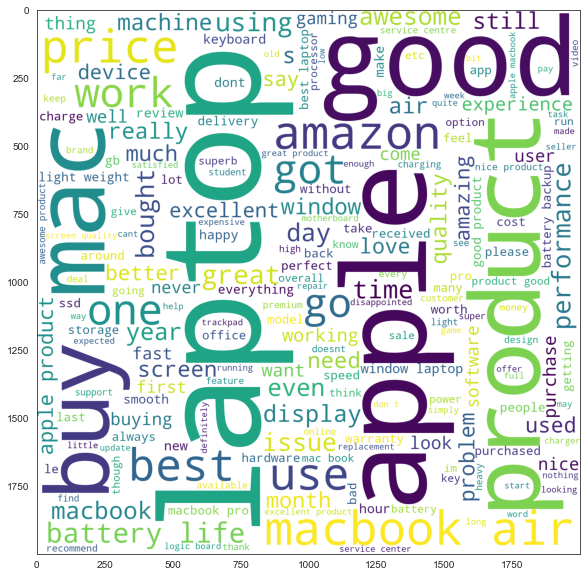

In [46]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

### Removing Punctuations
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [47]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1    amazing battery last around hrsbest laptop stu...
2    finally macbook possession got  diwali sale te...
3    buy macbooks expecting last least year case sa...
4    best laptop  dont want accounting software lik...
Name: Reviews, dtype: object

### Removing common words


In [48]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

laptop     882
product    858
apple      737
good       642
macbook    556
mac        440
air        406
battery    404
buy        343
best       338
dtype: int64

### Removing the words which are not useful for our classification.

In [49]:
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student coder
2    finally possession got diwali sale technically...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tally busy ...
Name: Reviews, dtype: object

### Removing the words with rare occurence
Replacing the rare words with a more general form to have higher counts

In [50]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq


displaysamsung    1
creaking          1
competing         1
itreplace         1
analyst           1
neckbreathing     1
paisa             1
experiences       1
coloured          1
touchcon          1
dtype: int64

In [51]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student cover
2    finally possession got dial sale technically l...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tall busy g...
5    pro light weight super fast response time high...
6    bought recently april working perfectly fine d...
7    upset checked day back december didn start luc...
8    hi think thousand time buying one calm night m...
9    pro user last year came across new got chance ...
Name: Reviews, dtype: object

### Tokenization


In [52]:
TextBlob(data['Reviews'][0]).words

WordList(['okay', 'seeing', 'people', 'display', 'macbooks', 'always', 'fancied', 'owning', 'one', 'premium', 'device', 'amazon', 'offer', 'reduced', 'price', 'getting', 'tempted', 'stop', 'consider', 'get', 'money', 'spend', 'think', 'add', 'premiumness', 'profile', 'device', 'next', 'line', 'support', 'withdrawn', 'resist', 'temptation', 'sell', 'last', 'reason', 'feeling', 'improves', 'profile', 'user', 'smirk', 'see', 'obsolete', 'dinosaur', 'device', 'display', 'latest', 'toysif', 'window', 'user', 'better', 'go', 'friend', 'try', 'activity', 'great', 'till', 'try', 'change', 'something', 'puny', 'mouse', 'cursor', 'realise', 'stuck', 'little', 'cozy', 'jail', 'try', 'anything', 'nonstandard', 'try', 'transferring', 'data', 'usb', 'stick', 'one', 'need', 'training', 'usb', 'partitioning', 'exfat', 'evn', 'partitioning', 'chance', 'window', 'recognise', 'usb', 'stick', 'power', 'user', 'real', 'pain', 'course', 'pretend', 'like', 'many', 'thousand', 'user', 'matter', 'hey', 'premiu

In [53]:
TextBlob(data['Reviews'][1]).words

WordList(['amazing', 'last', 'around', 'hrsbest', 'student', 'coder'])

### Stemming

In [54]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    okay see peopl display macbook alway fanci own...
1               amaz last around hrsbest student coder
2    final possess got diwali sale technic laptopgo...
3    macbook expect last least year case say cost r...
4    dont want account softwar like talli busi go b...
5    pro light weight super fast respons time highl...
6    bought recent april work perfectli fine day ap...
7    upset check day back decemb didnt start luckil...
8    hi think thousand time buy one calm night cudd...
9    pro user last year came across new got chanc p...
Name: Reviews, dtype: object

### Lemmatization

In [55]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()


0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student coder
2    finally possession got diwali sale technically...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tally busy ...
Name: Reviews, dtype: object

## Advanced Text Processing using NLP techniques

 
### N-gram analysis

In [56]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['okay', 'seeing']),
 WordList(['seeing', 'people']),
 WordList(['people', 'display']),
 WordList(['display', 'macbooks']),
 WordList(['macbooks', 'always']),
 WordList(['always', 'fancied']),
 WordList(['fancied', 'owning']),
 WordList(['owning', 'one']),
 WordList(['one', 'premium']),
 WordList(['premium', 'device']),
 WordList(['device', 'amazon']),
 WordList(['amazon', 'offer']),
 WordList(['offer', 'reduced']),
 WordList(['reduced', 'price']),
 WordList(['price', 'getting']),
 WordList(['getting', 'tempted']),
 WordList(['tempted', 'stop']),
 WordList(['stop', 'consider']),
 WordList(['consider', 'get']),
 WordList(['get', 'money']),
 WordList(['money', 'spend']),
 WordList(['spend', 'think']),
 WordList(['think', 'add']),
 WordList(['add', 'premiumness']),
 WordList(['premiumness', 'profile']),
 WordList(['profile', 'device']),
 WordList(['device', 'next']),
 WordList(['next', 'line']),
 WordList(['line', 'support']),
 WordList(['support', 'withdrawn']),
 WordList(['wit

### Term frequency (TF)


In [57]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,amazing,1.0
1,coder,1.0
2,hrsbest,1.0
3,last,3.0
4,student,1.0
...,...,...
514,evolved,1.0
515,browse,1.0
516,silver,1.0
517,metal,1.0


### Inverse Document Frequency(IDF)

In [58]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [59]:
tf1

,words,tf,idf
0,amazing,1.0,2.559691
1,coder,1.0,6.120737
2,hrsbest,1.0,7.730175
3,last,3.0,3.076214
4,student,1.0,3.901533
...,...,...,...
514,evolved,1.0,6.631563
515,browse,1.0,4.839803
516,silver,1.0,5.427590
517,metal,1.0,5.938415


The more the value of IDF, the more unique is the word.

### Term Frequency – Inverse Document Frequency (TF-IDF)

In [60]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,amazing,1.0,2.559691,2.559691
1,coder,1.0,6.120737,6.120737
2,hrsbest,1.0,7.730175,7.730175
3,last,3.0,3.076214,9.228643
4,student,1.0,3.901533,3.901533
...,...,...,...,...
514,evolved,1.0,6.631563,6.631563
515,browse,1.0,4.839803,4.839803
516,silver,1.0,5.427590,5.427590
517,metal,1.0,5.938415,5.938415


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<2276x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 22821 stored elements in Compressed Sparse Row format>

### Implementation of Bag of Words (BOW) using CountVectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<2276x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 26153 stored elements in Compressed Sparse Row format>

### Sentiment Analysis

In [63]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0     (0.15157563025210086, 0.41818394024276373)
1     (0.30000000000000004, 0.48333333333333334)
2       (-0.0043103448275862, 0.529022988505747)
3                   (-0.15, 0.23333333333333334)
4      (0.18055555555555555, 0.4601851851851852)
5       (0.3518253968253968, 0.6041269841269842)
6                    (0.11333333333333333, 0.36)
7    (-0.08833333333333333, 0.43166666666666664)
8                (-0.09843749999999998, 0.54375)
9       (0.160990146217419, 0.44677368086458996)
Name: Reviews, dtype: object

#### polarity indicates the sentiment here. If the sentiment value is close to 1, it's "POSITIVE" and if it's close to -1, it's "NEGATIVE"

In [64]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,okay seeing people display macbooks always fan...,0.151576
1,amazing last around hrsbest student coder,0.300000
2,finally possession got diwali sale technically...,-0.004310
3,macbooks expecting last least year case saying...,-0.150000
4,dont want accounting software like tally busy ...,0.180556


### Word Embeddings

In [65]:
!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

C:\Users\Public\anacon\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [95]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-words.txt'
word2vec_output_file = 'positive-words.txtpd.read_csv'


In [ ]:
#glove2word2vec(glove_input_file, word2vec_output_file)

In [72]:

import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,okay seeing people display macbooks always fan...,0.151576
1,amazing last around hrsbest student coder,0.300000
2,finally possession got diwali sale technically...,-0.004310
3,macbooks expecting last least year case saying...,-0.150000
4,dont want accounting software like tally busy ...,0.180556


In [74]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
0,4.0,okay seeing people display macbooks always fan...,0.151576,0.151576
1,5.0,amazing last around hrsbest student coder,0.300000,0.300000
4,5.0,dont want accounting software like tally busy ...,0.180556,0.180556
5,5.0,pro light weight super fast response time high...,0.351825,0.351825
6,1.0,bought recently april working perfectly fine d...,0.113333,0.113333


In [75]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [76]:
sent_type(data['polarity'])

positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
neutral
negative
neutral
positive
negative
neutral
positive
negative
negative
neutral
positive
positive
positive
neutral
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
neutral
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
negative
negative
negative
positive
neutral
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
neutral
positive
positive
negative
positive
positive
negative
positive
positive
negative
neutral
negative
negative
positive
neutral
negative
negative
positive
positive
negative
negative
positive
positive
negative
negative
positive
po

positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
negative
neutral
positive
positive
positive
positive
negative
negative
positive
negative
negative
positive
neutral
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
negative
positive
positive
neutral
positive
positive
negative
positive
positive
positive
positive
positive
neutral
negative
positive
positive
neutral
negative
positive
negative
positive
neutral
negative
negative
neutral
positive
positive
neutral
positive
positive
positive
negative
negative
negative
positive
negative
positive
posit

In [77]:
data["category"]=data['polarity']

In [78]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [79]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating         object
Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

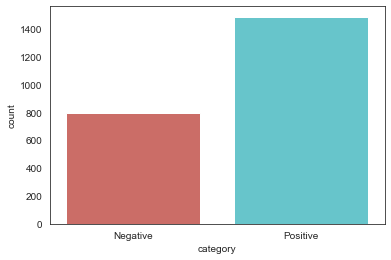

In [80]:
sns.countplot(x='category',data=data,palette='hls')

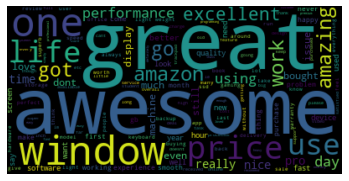

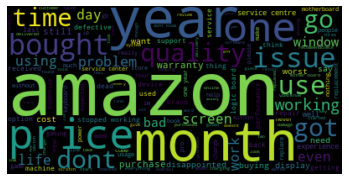

In [81]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()